In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [141]:
file = xr.open_dataset('test/prog__0002_026.nc', decode_times=False)

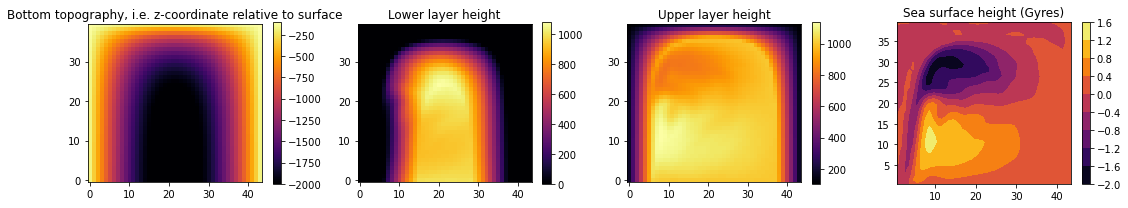

In [144]:
fig = plt.figure(figsize = (15,3))
plt.subplot(141)
plt.imshow(file.e.isel(Time=-1, zi=2), origin='lower', cmap='inferno'); plt.colorbar()
plt.title('Bottom topography, i.e. z-coordinate relative to surface')
plt.subplot(142)
plt.imshow(file.h.isel(Time=-1, zl=1), origin='lower', cmap='inferno'); plt.colorbar()
plt.title('Lower layer height')
plt.subplot(143)
plt.imshow(file.h.isel(Time=-1, zl=0), origin='lower', cmap='inferno'); plt.colorbar()
plt.title('Upper layer height')
plt.subplot(144)
plt.contourf(file.e.isel(Time=-1, zi=0), origin='lower', cmap='inferno');plt.colorbar()
plt.title('Sea surface height (Gyres)')
plt.tight_layout()

In [135]:
path_bare = '/scratch/pp2681/mom6/experiments/Zanna-Bolton/256/output/energy__*.nc'
path_ZB   = '/scratch/pp2681/mom6/experiments/Zanna-Bolton/256_ZB2020/output/energy__*.nc'

In [136]:
ds_bare = xr.open_mfdataset(path_bare,decode_times=False)
ds_ZB   = xr.open_mfdataset(path_ZB,decode_times=False)

In [12]:
def extract_time_series(ds, key):
    array = ds[key] # time x level x Y x X
    return np.array(array).mean(axis=(2,3))

In [76]:
KE_bare = extract_time_series(ds_bare, 'KE')
KE_ZB = extract_time_series(ds_ZB, 'KE')
PE_KE_bare = extract_time_series(ds_bare, 'PE_to_KE')
PE_KE_ZB = extract_time_series(ds_ZB, 'PE_to_KE')

In [14]:
KE_bare.shape

(243, 2)

Text(0.5, 1.0, 'Kinetic energy lower layer')

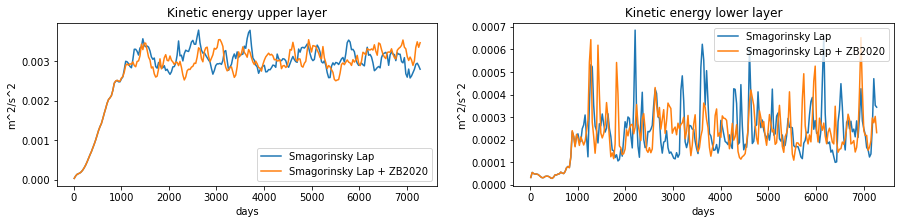

In [36]:
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(ds_bare.Time, KE_bare[:,0])
plt.plot(ds_bare.Time, KE_ZB[:,0])
plt.xlabel('days')
plt.ylabel('m^2/s^2')
plt.legend(['Smagorinsky Lap', 'Smagorinsky Lap + ZB2020'])
plt.title('Kinetic energy upper layer')
plt.subplot(122)
plt.plot(ds_bare.Time, KE_bare[:,1])
plt.plot(ds_bare.Time, KE_ZB[:,1])
plt.xlabel('days')
plt.ylabel('m^2/s^2')
plt.legend(['Smagorinsky Lap', 'Smagorinsky Lap + ZB2020'])
plt.title('Kinetic energy lower layer')

In [37]:
path_bare = 'experiments/Zanna-Bolton/256/output/prog__*.nc'
path_ZB   = 'experiments/Zanna-Bolton/256_ZB2020/output/prog_*.nc'

In [38]:
ds_bare = xr.open_mfdataset(path_bare,decode_times=False)
ds_ZB   = xr.open_mfdataset(path_ZB,decode_times=False)

Text(0.5, 1.0, 'Smagorinsky Lap + ZB2020')

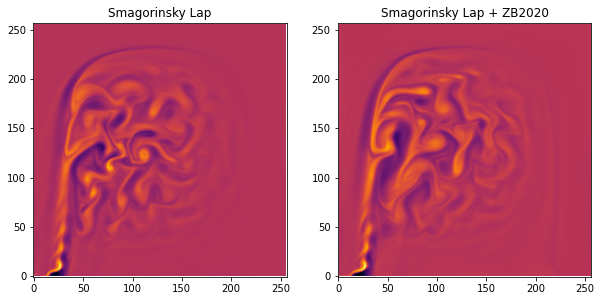

In [71]:
t = -1
plt.figure(figsize=(10,10))
plt.subplot(121)
im = plt.imshow(ds_bare['RV'].isel(Time=t,zl=0), origin='lower', cmap='inferno')
plt.title('Smagorinsky Lap')
plt.subplot(122)
im = plt.imshow(ds_ZB['RV'].isel(Time=t,zl=0), origin='lower', cmap='inferno')
plt.title('Smagorinsky Lap + ZB2020')
#plt.colorbar(im)